# PROBLEM STATEMENT:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. 

# FEATURES:

1. Brand: Brand of the car.

2. Model: Model name of the car

3. ariant: Variant specifies the type of the engine,model type(base model ,top model etc..).

4. auto_Manual: It specifies if it is an automatic ot manually driven gear car.

5. Manufacturing Year: It gives the year manufacturing year of the car i.e with which we can find how old the car is.

6. Driven_in_km: Identifies the total distance driven by the car in km.

7. Fuel_type: By this feature we can know the type of fuel used for the car(petrol/diesel/CNG)

8. no_Of_Owner: it says how many times the car is being reselled i.e change in no.of owners.

9. Location: Specifies the location.

10. Price: The price of the car


10 Independent variables with Price as target varibles

 From the dataset we  can infer that it is clearly a regression problem.
 

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
#import xgboost as xgb

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df=pd.read_csv('CarData.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data Inspection

In [4]:
df=df.rename({'Brand':'Model','model':'brand_name'},axis=1)

In [5]:
df.head()

Unnamed: 0    Model brand_name                variant auto_Manual  \
0           0  Celerio     Maruti                   VXI       Manual   
1           1     Figo       Ford  1.2 TITANIUM DURATEC       Manual   
2           2    Swift     Maruti         VXI 1.2 BS IV       Manual   
3           3     Alto     Maruti                   VXI       Manual   
4           4    Elite    Hyundai         ASTA 1.4 CRDI       Manual   

   Manufacturing Year  Driven_in_km Fuel_type  no_Of_Owner    Location   Price  
0                2014        167450    Petrol            1  Bengaluru   366199  
1                2013         31710    Petrol            1  Bengaluru   409299  
2                2014         49515    Petrol            1  Bengaluru   451399  
3                2012         49493    Petrol            1  Bengaluru   311199  
4                2016         43221    Diesel            2  Bengaluru   699599

In [6]:
df.tail()

Unnamed: 0 Model brand_name    variant auto_Manual  Manufacturing Year  \
5476        5476     S     Maruti  VXI PLUS       Manual                2019   
5477        5477  Alto     Maruti       LXI       Manual                2018   
5478        5478  Alto     Maruti       VXI       Manual                2015   
5479        5479  Alto     Maruti       LXI       Manual                2016   
5480        5480  Alto     Maruti       LXI       Manual                2012   

      Driven_in_km Fuel_type  no_Of_Owner  Location   Price  
5476         21938    Petrol            1  Kolkata   442199  
5477         34696    Petrol            1  Kolkata   296499  
5478         28718    Petrol            1  Kolkata   286999  
5479         16768    Petrol            1  Kolkata   256399  
5480           939    Petrol            1  Kolkata   211399

In [7]:
df.shape

(5481, 11)

The dataset consists of 11 rows and 5481 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5481 non-null   int64 
 1   Model               5481 non-null   object
 2   brand_name          5481 non-null   object
 3   variant             5481 non-null   object
 4   auto_Manual         5481 non-null   object
 5   Manufacturing Year  5481 non-null   int64 
 6   Driven_in_km        5481 non-null   int64 
 7   Fuel_type           5481 non-null   object
 8   no_Of_Owner         5481 non-null   int64 
 9   Location            5481 non-null   object
 10  Price               5481 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 471.1+ KB


The dataset seems to be a combination of both categorical data nad numerical data.

In [9]:
df.isnull().sum() #  Seems there is no null values in the dataset 

Unnamed: 0            0
Model                 0
brand_name            0
variant               0
auto_Manual           0
Manufacturing Year    0
Driven_in_km          0
Fuel_type             0
no_Of_Owner           0
Location              0
Price                 0
dtype: int64

In [10]:
# See the statistical data
df.describe()

Unnamed: 0  Manufacturing Year   Driven_in_km  no_Of_Owner  \
count  5481.000000         5481.000000    5481.000000  5481.000000   
mean   2740.000000         2016.567415   42886.563766     1.204342   
std    1582.372744            2.229748   32726.123364     0.453924   
min       0.000000         2008.000000      58.000000     1.000000   
25%    1370.000000         2015.000000   19746.000000     1.000000   
50%    2740.000000         2017.000000   35212.000000     1.000000   
75%    4110.000000         2018.000000   57820.000000     1.000000   
max    5480.000000         2021.000000  280921.000000     5.000000   

              Price  
count  5.481000e+03  
mean   6.084402e+05  
std    3.111179e+05  
min    1.716990e+05  
25%    4.067990e+05  
50%    5.317990e+05  
75%    7.109990e+05  
max    3.556799e+06

In [11]:
# Check for the uniqueness of the values
df.nunique()

Unnamed: 0            5481
Model                  107
brand_name              24
variant                598
auto_Manual              2
Manufacturing Year      14
Driven_in_km          4130
Fuel_type                4
no_Of_Owner              5
Location                10
Price                 2907
dtype: int64

In [12]:
# Also we can see there is a feature unnamed 0 which has no use in model building.
# Hence we can drop the column

In [13]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [14]:
df.shape

(5481, 10)

<AxesSubplot:>

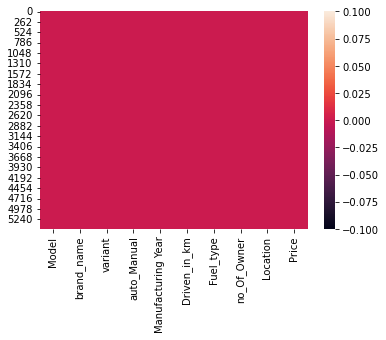

In [15]:
sns.heatmap(df.isnull())

No Null value is visible

# Exploratory Data Analysis


Lets seperate the categorical and numerical values

In [16]:
categorical=[feature for feature in df.columns if df[feature].dtype=='O']
print(len(categorical))
print(categorical)


6
['Model', 'brand_name', 'variant', 'auto_Manual', 'Fuel_type', 'Location']


In [17]:
numerical=[feature for feature in df.columns if df[feature].dtype!='O']
print(len(numerical))
print(numerical)

4
['Manufacturing Year', 'Driven_in_km', 'no_Of_Owner', 'Price']


 Univariate Analysis

In [18]:
df.head()

Model brand_name                variant auto_Manual  Manufacturing Year  \
0  Celerio     Maruti                   VXI       Manual                2014   
1     Figo       Ford  1.2 TITANIUM DURATEC       Manual                2013   
2    Swift     Maruti         VXI 1.2 BS IV       Manual                2014   
3     Alto     Maruti                   VXI       Manual                2012   
4    Elite    Hyundai         ASTA 1.4 CRDI       Manual                2016   

   Driven_in_km Fuel_type  no_Of_Owner    Location   Price  
0        167450    Petrol            1  Bengaluru   366199  
1         31710    Petrol            1  Bengaluru   409299  
2         49515    Petrol            1  Bengaluru   451399  
3         49493    Petrol            1  Bengaluru   311199  
4         43221    Diesel            2  Bengaluru   699599

In [19]:
df2=df.groupby('brand_name')
df2=df2["Model"].apply(list)
df2=df2.reset_index()
print(df2)

    brand_name                                              Model
0         Audi  [A3, Q3, Q3, Q3, A3, A6, Q3, A4, Q3, A4, A3, A...
1          BMW  [X1, 3, 5, X1, 5, 5, 5, 3, 3, 3, 3, X1, X1, X1...
2       Datsun  [Redi, Redi, Redi, Redi, Redi, Redi, Redi, Red...
3         Fiat                                            [Punto]
4         Ford  [Figo, Figo, Ecosport, Ecosport, Ecosport, New...
5      HYUNDAI                                         [NEW, NEW]
6        Honda  [Brio, Amaze, City, Brio, Brio, Brio, Amaze, C...
7      Hyundai  [Elite, Elite, Creta, i20, Grand, Elite, VENUE...
8       Jaguar                                           [XF, XF]
9         Jeep  [Compass, Compass, Compass, Compass, Compass, ...
10         KIA  [SELTOS, SELTOS, SELTOS, SELTOS, SELTOS, SELTO...
11   Landrover                                       [Freelander]
12          MG  [HECTOR, HECTOR, HECTOR, HECTOR, HECTOR, HECTO...
13    Mahindra  [Scorpio, XUV500, XUV, XUV500, Scorpio, XUV, X...
14      Ma

# Univariate Analysis of categorical variables

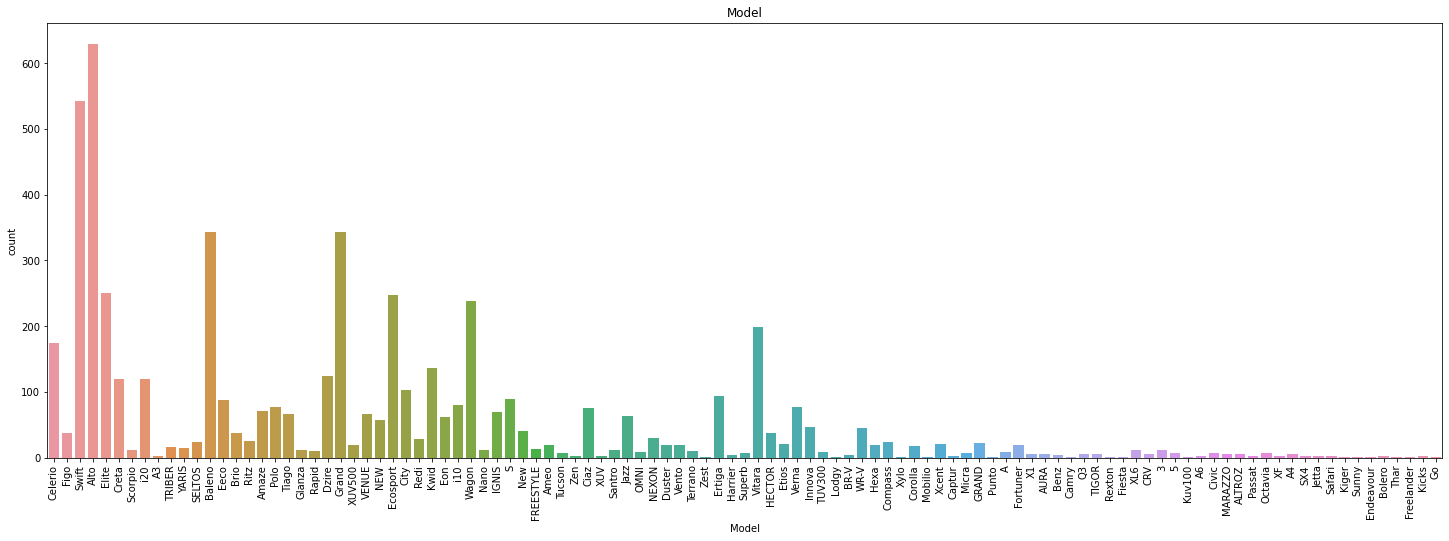

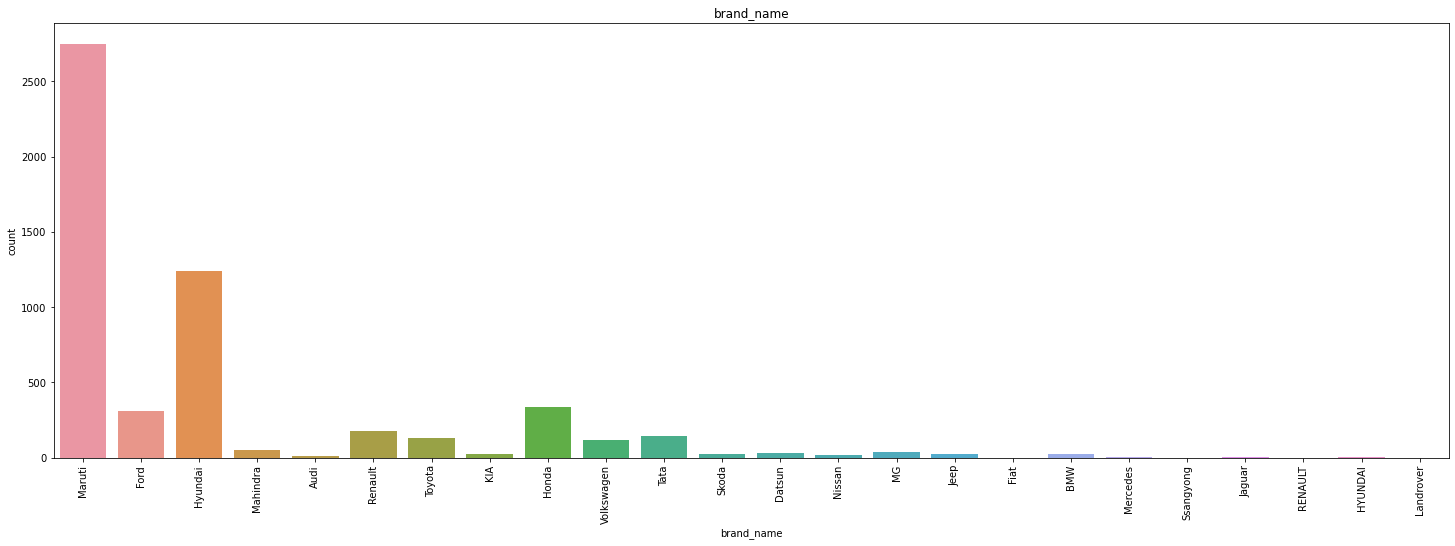

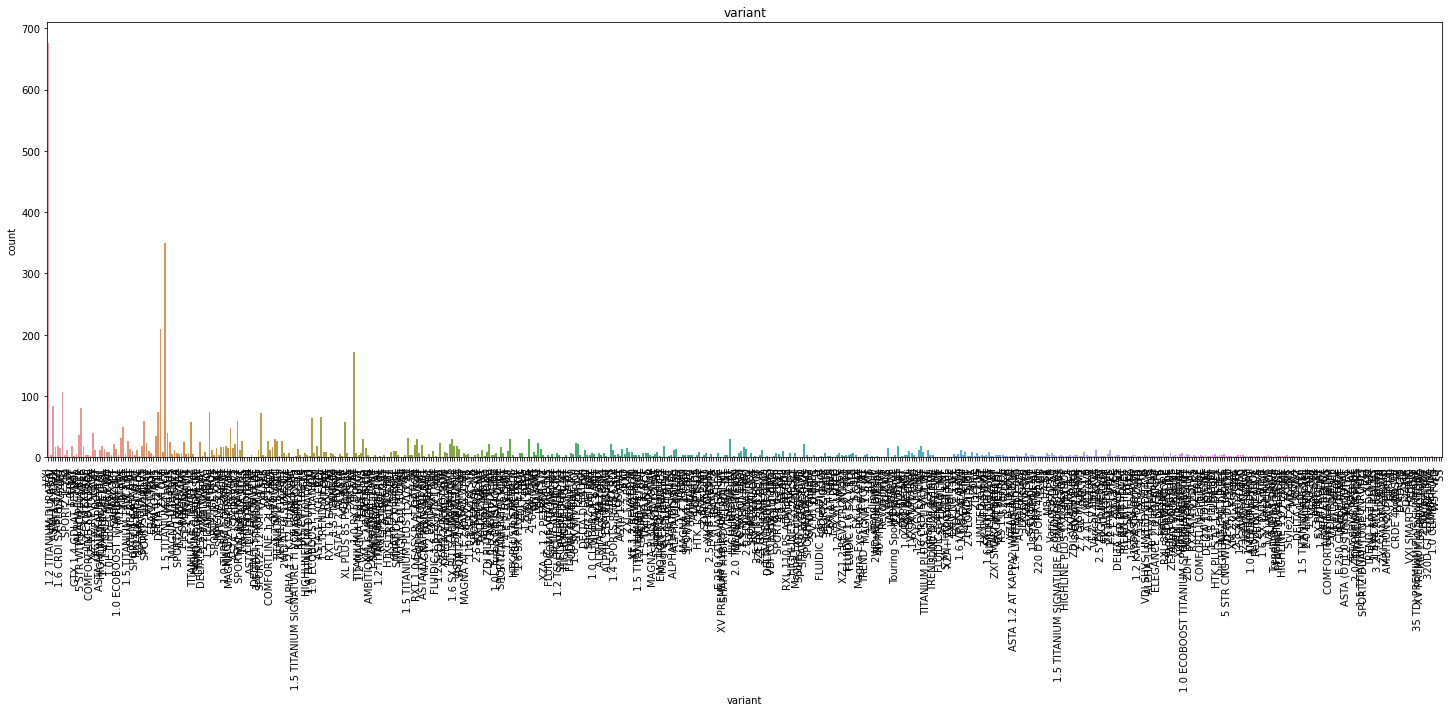

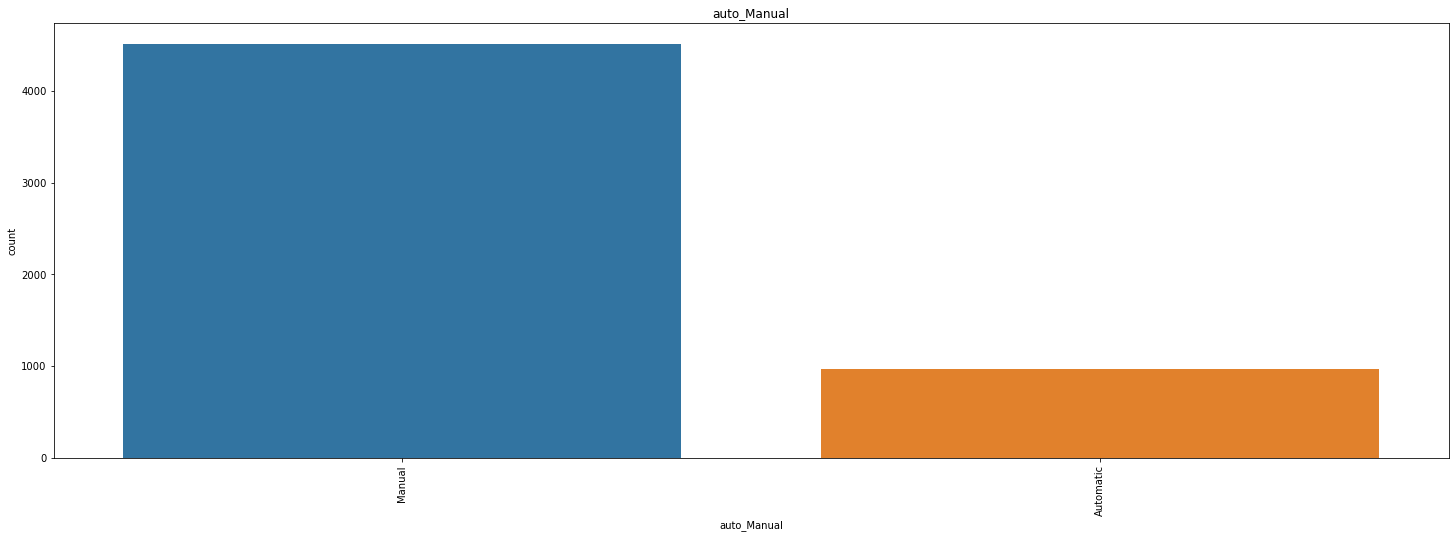

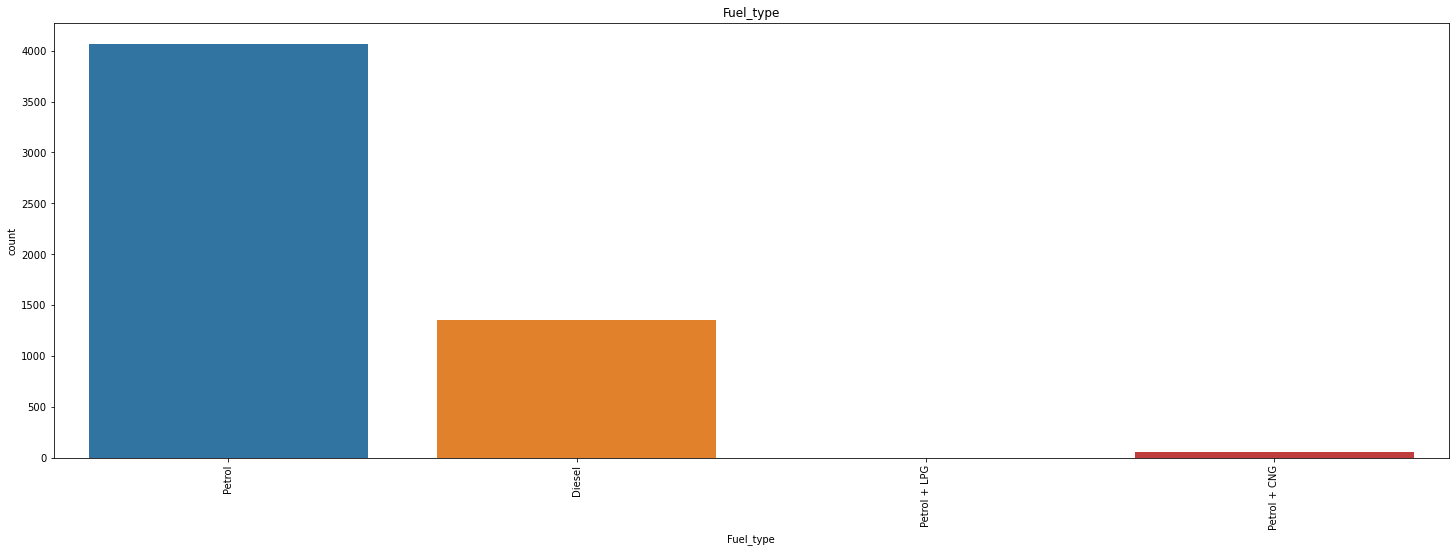

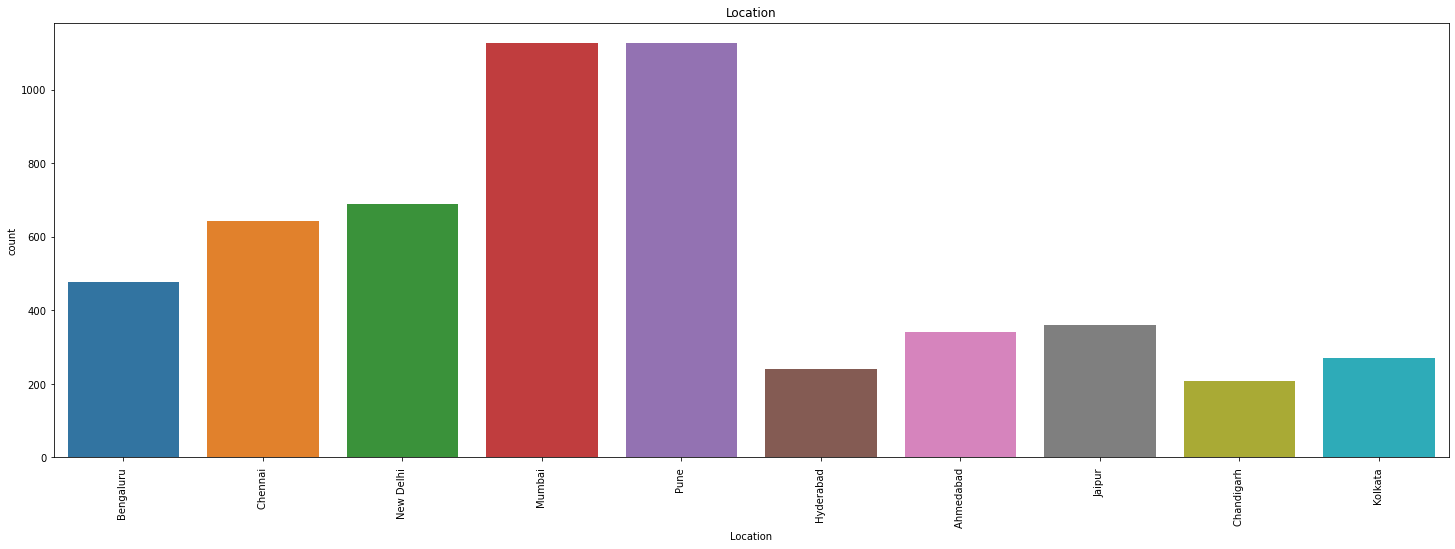

In [20]:
for i in categorical:
    plt.figure(figsize=(25,8))
    sns.countplot(x=df[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
   
    #plt.legend(loc='upper right')

OBSERVATION:

    1. Largest sale is Alto car,followed by swift then elite and so on as per the visualization.
    2. Highest sale is of Maruti Brand followed by Hyuandai and Honda.
    3. Mostly manual cars are on sale.
    4. No of petrol are maximum on sale.
    5. People staying art Mumbai and Pune are selling their cars mostly followed by New Delhi location.
    6. Variant is not giving much impact on the price prediction so we can simply ignore it.
    

# Bi-variate plotting of categorical variables

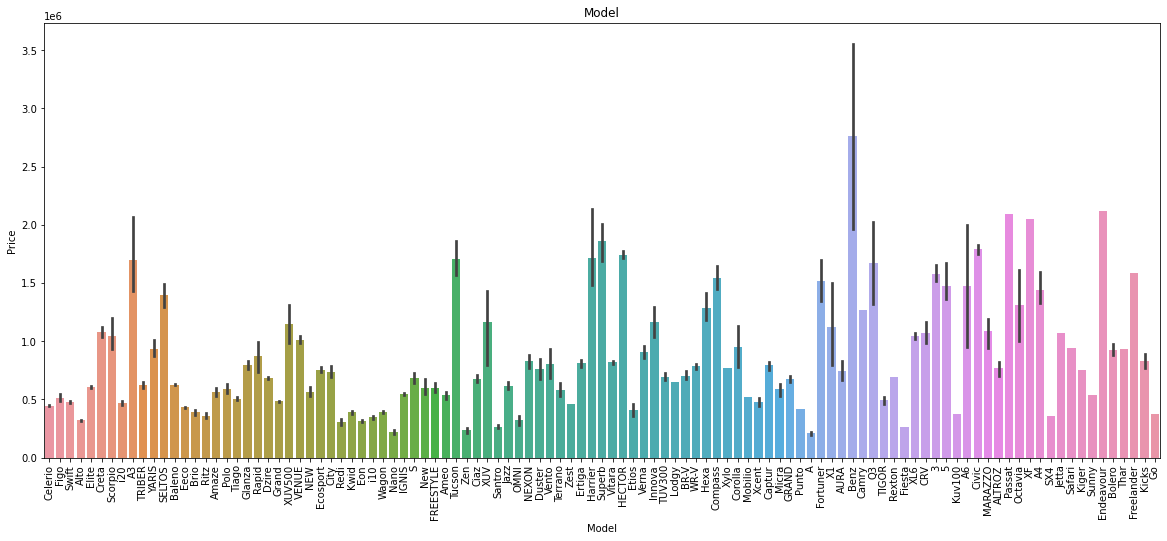

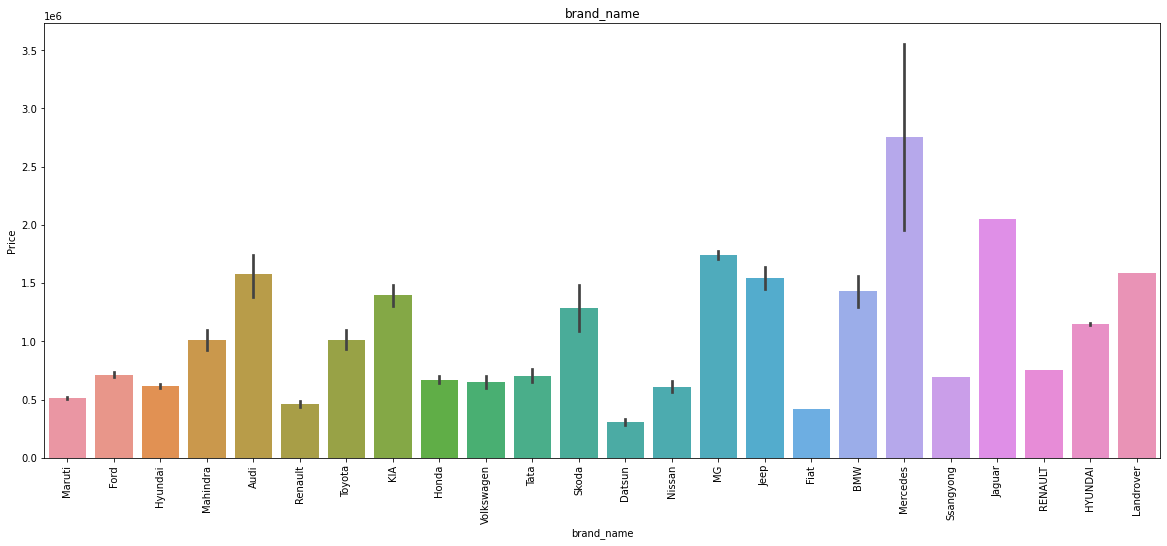

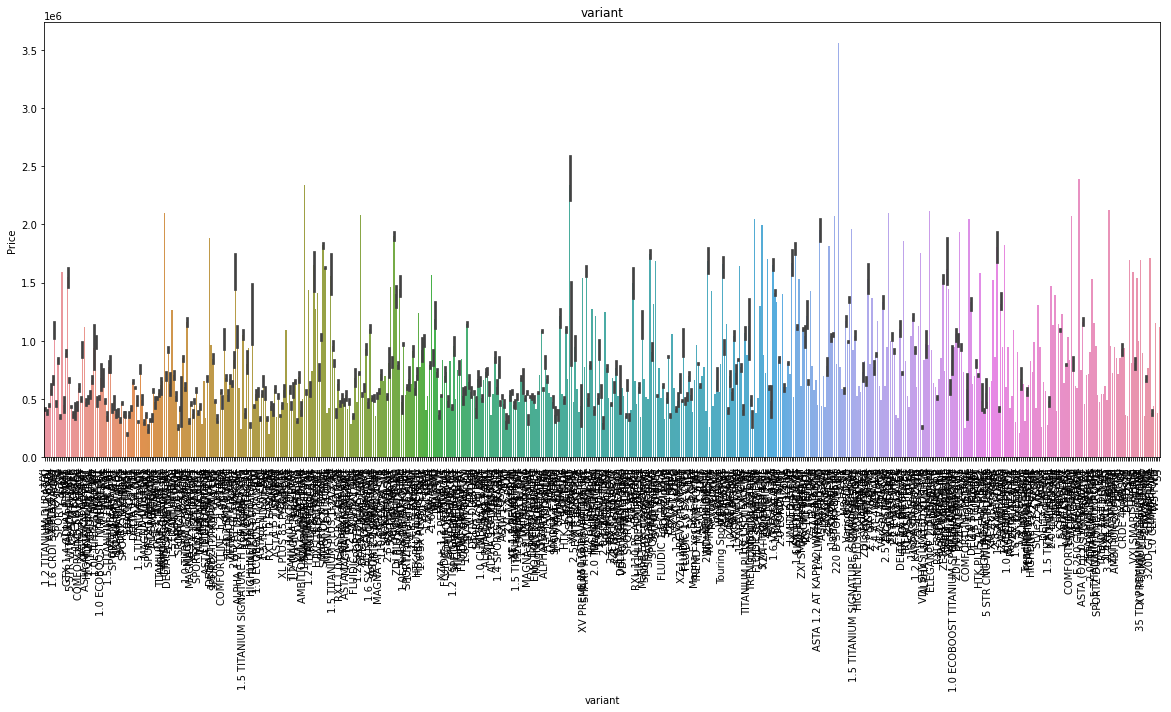

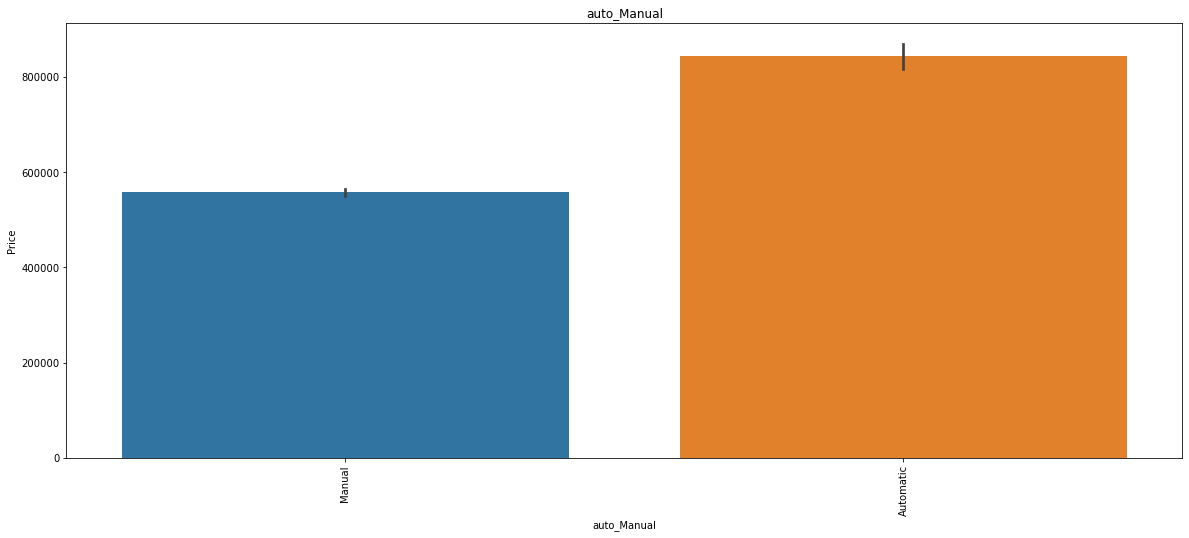

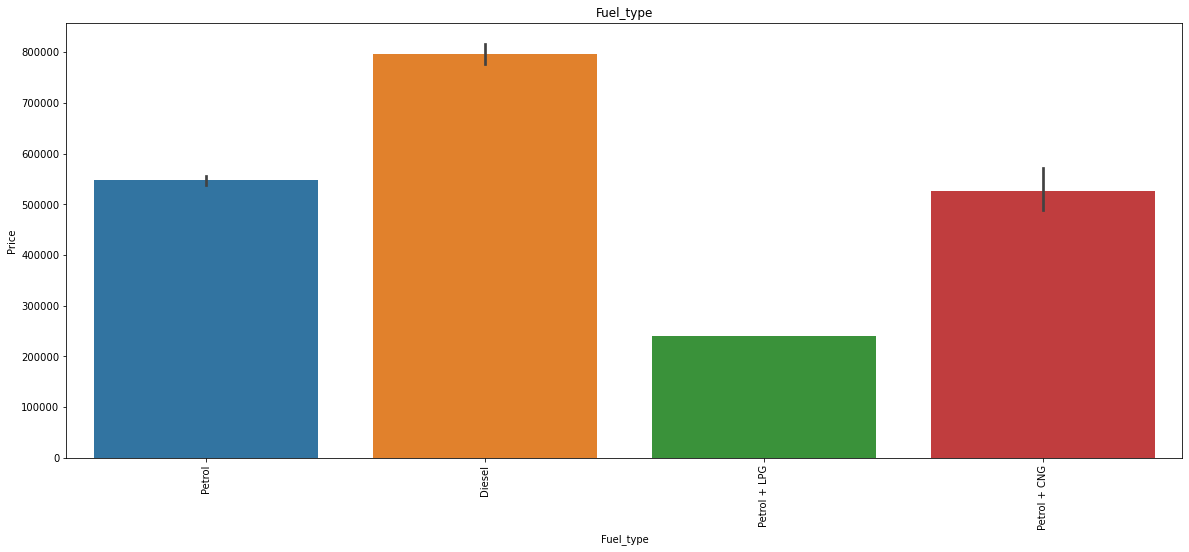

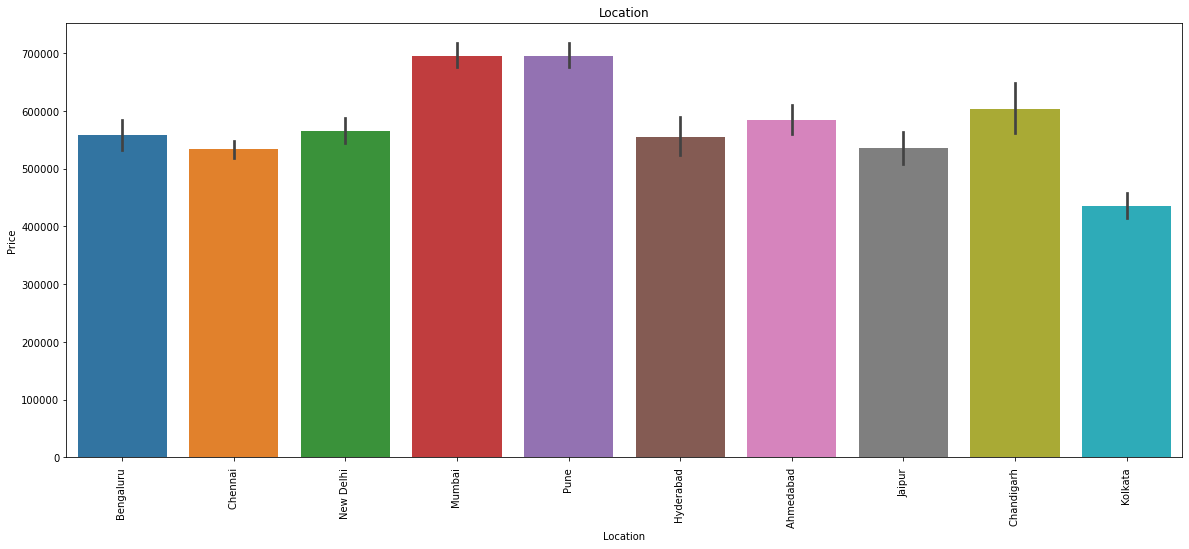

In [21]:
for i in categorical:
    plt.figure(figsize=(20,8))
    sns.barplot(x=df[i],y='Price',data=df)
    plt.xlabel(i)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()
    

OBSERVATION:
    
1. Benz having highest price followed by Superb, Harrier and so on.
2. Mercedes brand is having highest price followed by Jaguar.
3. Automatic cars are higher in price as compared to manual cars.
4. Diesel cars are having  higher resale value compared to petrol and combination of petrol and CNG.
5. Price of cars at Pune and Mumbai are highest follwed by Chandigarh.

In [22]:
categorical

['Model', 'brand_name', 'variant', 'auto_Manual', 'Fuel_type', 'Location']

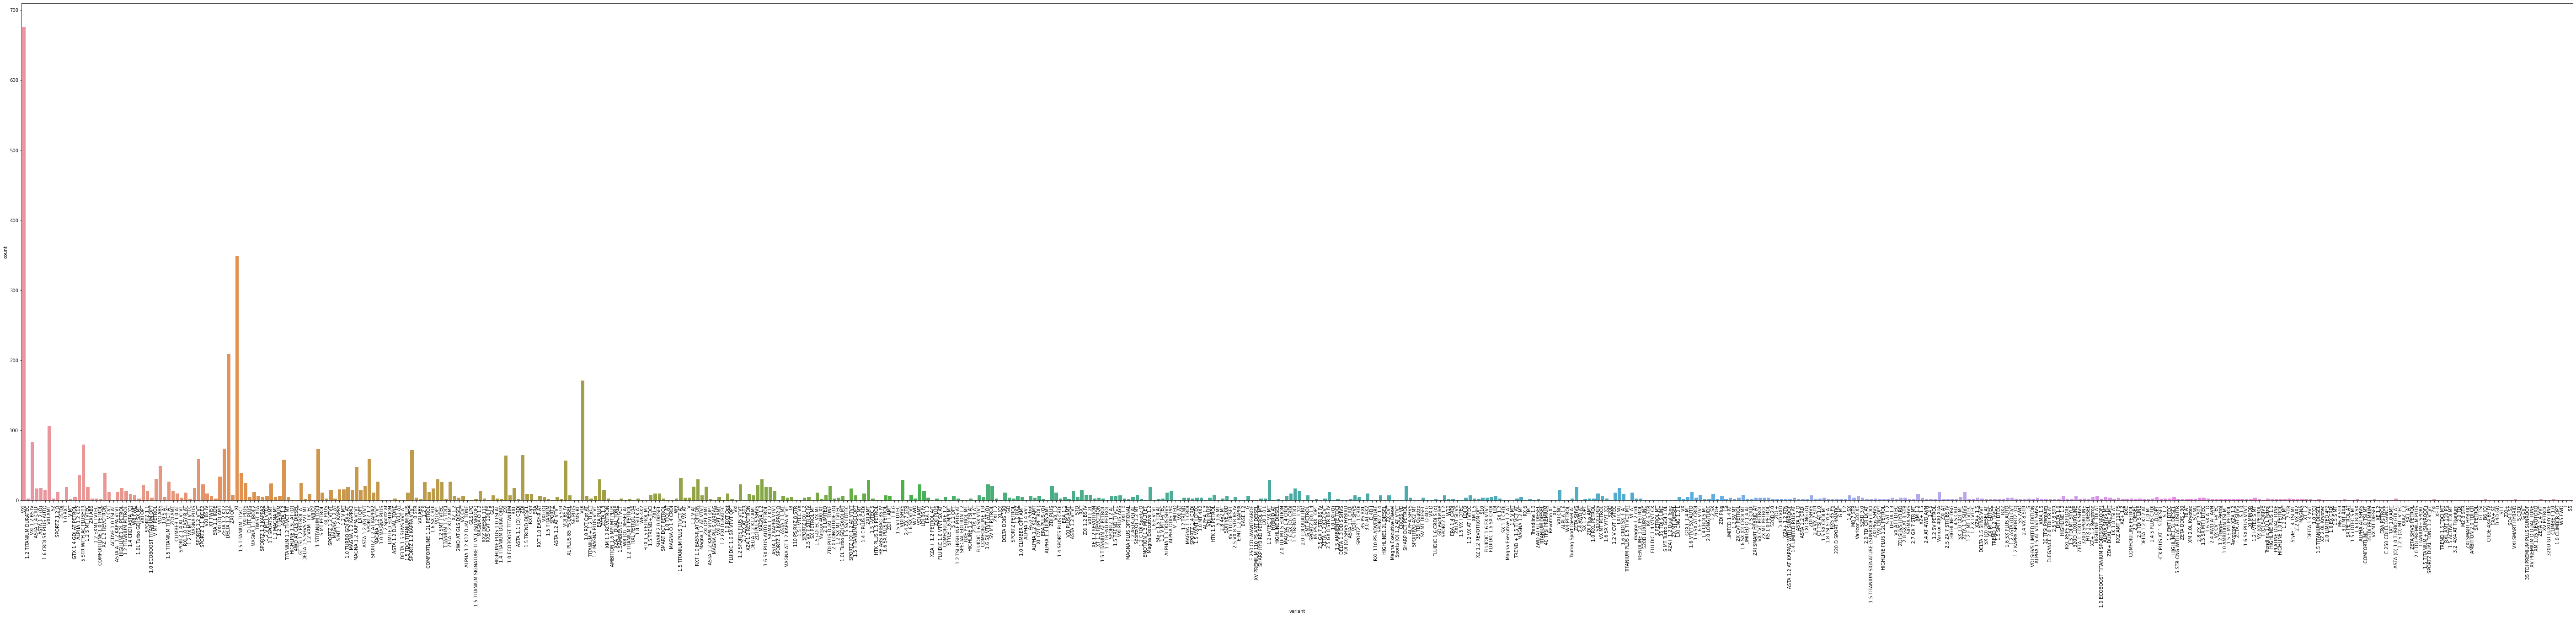

In [23]:
# Only for variant
plt.figure(figsize=(100,20))
sns.countplot(df['variant'])
plt.xticks(rotation=90)
plt.show()

We can infer that VXI and LXI model are maximum in number for sale.

#  Univariate Analysis of Numerical  variables

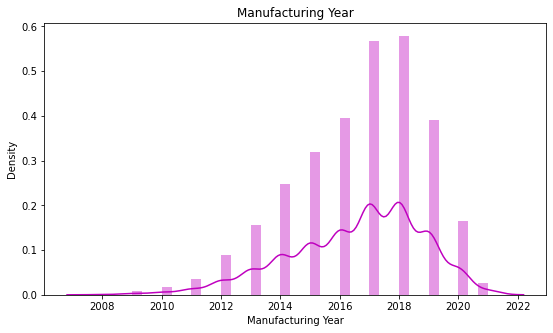

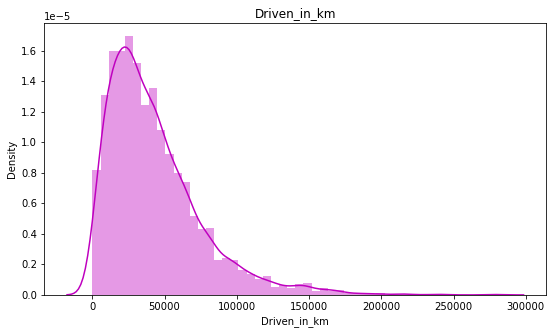

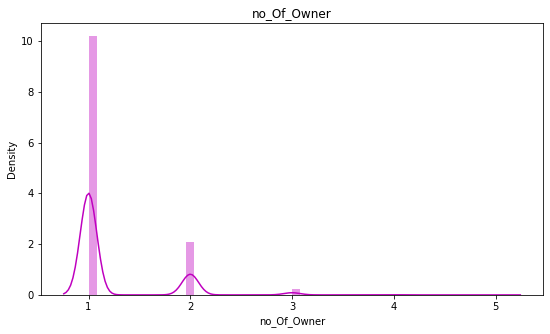

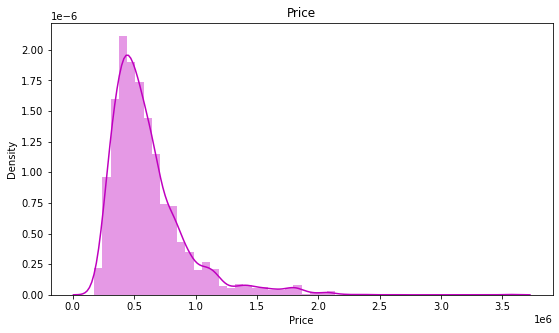

In [24]:
for i in numerical:
    plt.figure(figsize=(9,5))
    sns.distplot(df[i],color='m',hist=True)
    plt.title(i)
    plt.show()

OBSERVATION:

    1. Most of the cars are saled during the year 2017 and 2018.
    2. Most of the cars that are for resale are driven for the less than 50000 km.
    3. Most of the cars on Cars24 were on sell for first time.
    4. Our target variable price feature is  skewed.
    5. Also no of owners and Driven km are  skewed.
    6. But we can see that our manufacturing year is skewed.
    

# Bivariate Analysis of Numerical values

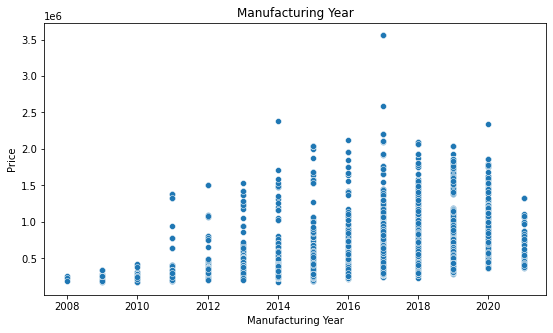

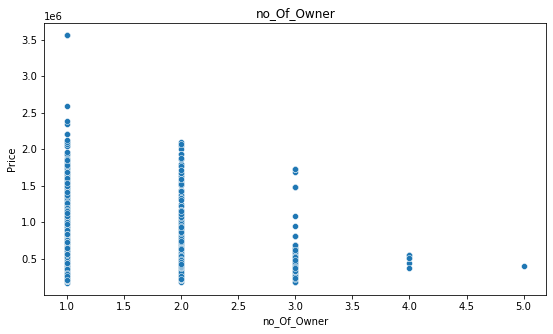

In [25]:
for i in numerical:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=df[i],y=df['Price'])
    plt.title(i)
    plt.show()
    
    

OBSERVATION:
    Our target variable is clearly showing a linear regression line. Hence the model building will be a regression problem.
    1. Price of only one owner is comparatively high than 2 or 3 owner.
    2. Price of the cars manufactured in the year 2017 is highest.
    3. Lesser the driven km ,higher is the Price.


In [26]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()
        

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

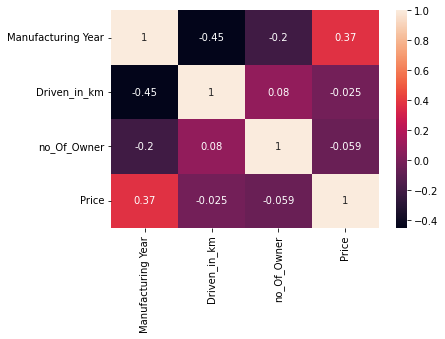

In [27]:
sns.heatmap(df.corr(),annot=True)


# See the Outliers

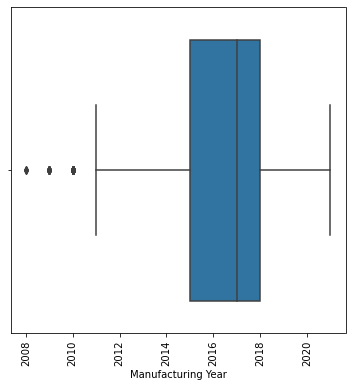

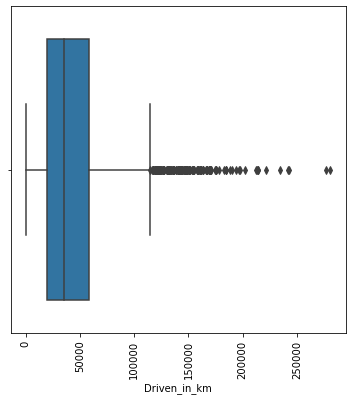

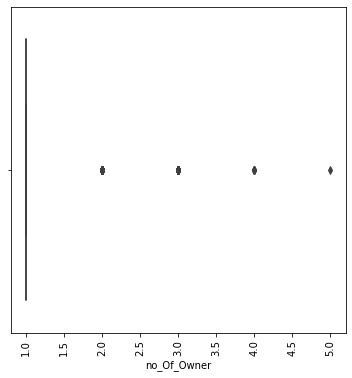

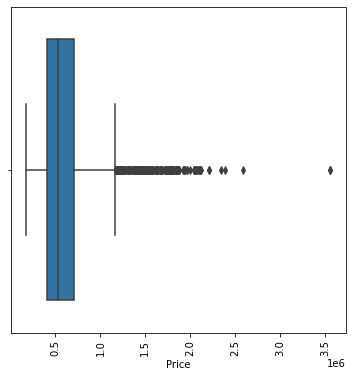

In [28]:
for i in numerical:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[i])
    plt.xticks(rotation=90)
    plt.show()
    

OBSERVATION:
    Outliers are present 

# Data Preprocessing

We need to change the categorical values to numerical values using label encoding

In [29]:
categorical

['Model', 'brand_name', 'variant', 'auto_Manual', 'Fuel_type', 'Location']

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [31]:
df['Model']=encoder.fit_transform(df['Model'])
df['brand_name']=encoder.fit_transform(df['brand_name'])
df['variant']=encoder.fit_transform(df['variant'])
df['auto_Manual']=encoder.fit_transform(df['auto_Manual'])
df['Fuel_type']=encoder.fit_transform(df['Fuel_type'])
df['Location']=encoder.fit_transform(df['Location'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Model               5481 non-null   int32
 1   brand_name          5481 non-null   int32
 2   variant             5481 non-null   int32
 3   auto_Manual         5481 non-null   int32
 4   Manufacturing Year  5481 non-null   int64
 5   Driven_in_km        5481 non-null   int64
 6   Fuel_type           5481 non-null   int32
 7   no_Of_Owner         5481 non-null   int64
 8   Location            5481 non-null   int32
 9   Price               5481 non-null   int64
dtypes: int32(6), int64(4)
memory usage: 299.9 KB


In [33]:
df.head()

Model  brand_name  variant  auto_Manual  Manufacturing Year  Driven_in_km  \
0     19          14      485            1                2014        167450   
1     37           4       43            1                2013         31710   
2     81          14      489            1                2014         49515   
3      8          14      485            1                2012         49493   
4     30           7      220            1                2016         43221   

   Fuel_type  no_Of_Owner  Location   Price  
0          1            1         1  366199  
1          1            1         1  409299  
2          1            1         1  451399  
3          1            1         1  311199  
4          0            2         1  699599

In [34]:
df.skew()


Model                 0.333137
brand_name            0.073406
variant              -0.467668
auto_Manual          -1.698189
Manufacturing Year   -0.604984
Driven_in_km          1.637783
Fuel_type            -0.853430
no_Of_Owner           2.254379
Location             -0.514102
Price                 2.147569
dtype: float64

In [35]:
#Driven_norm=np.sqrt(df['Driven_in_km'])
#Driven_norm.skew()


In [36]:
#owner_norm=np.log(df['no_Of_Owner'])
#owner_norm.skew()


In [37]:
#Price_norm=np.log(df['Price'])
#Price_norm.skew()

<AxesSubplot:>

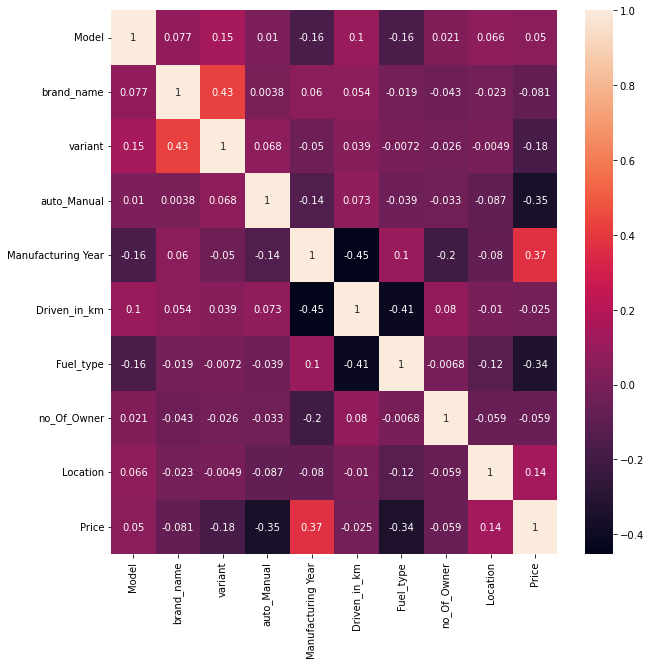

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Observation:Brand Name,Variant,Manufacturing year and Price are showing mild correlation.

# Model Building

In [39]:

Y=df['Price']    # Dependent Variable
X=df.drop('Price',axis=1)   # Independent variables

In [40]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
sc.fit_transform(X)
x_scaled=pd.DataFrame(X,columns=X.columns)

In [42]:
# Split the train dataset:

X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=42)

In [43]:
# Creating objects for the Regressor Models
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
Random=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()


In [44]:
# For fitting the model

alg=[Linear,DecisionTree,knn,Random,AdaBoost]
acc_models={}
for model in alg:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print("Model Name:",model) 
    print('Accuracy ::',{round(r2_score(Y_test,Y_pred)*100,1)})
    print('Mean Absolute Error(MAE) is::',{mean_absolute_error(Y_test,Y_pred)})
    print('Mean Squared Error(MSE) ::',{mean_squared_error(Y_test,Y_pred)})
    print('Root Mean Squared Error is ::',{np.sqrt(mean_squared_error(Y_test,Y_pred))})
    print("--------------------------------------------------------")


Model Name: LinearRegression()
Accuracy :: {38.1}
Mean Absolute Error(MAE) is:: {162609.277845297}
Mean Squared Error(MSE) :: {56012116954.95859}
Root Mean Squared Error is :: {236668.79167933948}
--------------------------------------------------------
Model Name: DecisionTreeRegressor()
Accuracy :: {87.2}
Mean Absolute Error(MAE) is:: {41206.10756608933}
Mean Squared Error(MSE) :: {11549803801.276207}
Root Mean Squared Error is :: {107470.013498074}
--------------------------------------------------------
Model Name: KNeighborsRegressor()
Accuracy :: {4.5}
Mean Absolute Error(MAE) is:: {205249.4804010939}
Mean Squared Error(MSE) :: {86324571798.72379}
Root Mean Squared Error is :: {293810.4351426678}
--------------------------------------------------------
Model Name: RandomForestRegressor()
Accuracy :: {91.7}
Mean Absolute Error(MAE) is:: {38452.98645396536}
Mean Squared Error(MSE) :: {7494400410.0051565}
Root Mean Squared Error is :: {86570.2050939303}
-----------------------------

In [45]:
acc_models 

{LinearRegression(): 38.1,
 DecisionTreeRegressor(): 87.2,
 KNeighborsRegressor(): 4.5,
 RandomForestRegressor(): 91.7,
 AdaBoostRegressor(): 39.2}

Random

In [46]:
CVmodel={}

for model in alg:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,x_scaled,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.3902358927109512 at k-fold::2

Mean CV Score of model LinearRegression():: 0.3406190875772191 at k-fold::3

Mean CV Score of model LinearRegression():: 0.3397657074858885 at k-fold::4

Mean CV Score of model LinearRegression():: 0.34249062416532394 at k-fold::5

Mean CV Score of model LinearRegression():: 0.34209034675507805 at k-fold::6

Mean CV Score of model LinearRegression():: 0.3327612263739346 at k-fold::7

Mean CV Score of model LinearRegression():: 0.3483913936421194 at k-fold::8

Mean CV Score of model LinearRegression():: 0.33223799163550016 at k-fold::9


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.7993008024535878 at k-fold::2

Mean CV Score of model DecisionTreeRegressor():: 0.7316228213885676 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: 0.824876230602481 at k-fold::4

Mean CV Score of model DecisionTree

In [47]:
CVmodel

{'LinearRegression()': [0.3902358927109512],
 'DecisionTreeRegressor()': [0.824876230602481],
 'KNeighborsRegressor()': [0.0372847789018903],
 'RandomForestRegressor()': [0.8868299330037606],
 'AdaBoostRegressor()': [0.3712124112167598]}

<AxesSubplot:xlabel='Price', ylabel='Density'>

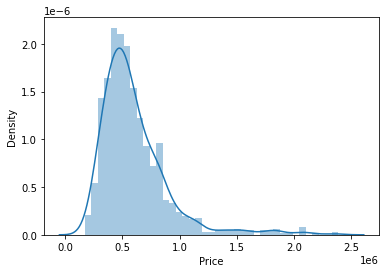

In [48]:
sns.distplot((Y_test))

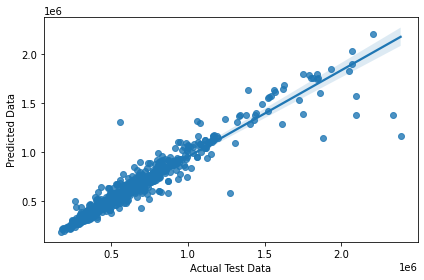

In [49]:
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [50]:
df=pd.DataFrame({'Y Test':Y_test,'Pred':Y_pred},columns=['Y Test','Pred'])
df.head()

Y Test       Pred
3410   507299   496908.0
1892  1067099  1099545.0
8      493499   487210.0
4529   684299   674677.0
1055   608799   513150.0

# Hyper Tuning the Random Forest Model:

In [51]:
X_train,Y_train,X_test,Y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=80)
estimator=RandomForestRegressor()

param_grid={
    "n_estimators":[10,20,30,40],
    "max_features":["auto", "sqrt", "log2"],
    "min_samples_split":[2,4,8,10,12],
    "bootstrap":[True,False]    
}
gridsearch=GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

gridsearch.fit(x_scaled,Y)
print(gridsearch.best_params_ , gridsearch.best_score_)

{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 40} 0.8914814366523756


In [52]:
RandomForest=RandomForestRegressor(n_estimators=40,max_features='log2',min_samples_split=2,bootstrap=False)
RandomForest.fit(x_scaled,Y)
Y_pred=RandomForest.predict(x_scaled)
r2_sc=r2_score(Y,Y_pred)
print("r2_score:",r2_sc*100)

r2_score: 99.99999919316882


As we can see that after hypertuning the model with Random Forest Regressor,it is getting overfitted. 

Hence we can go with normal Random Forest Regressor model with is also giving good accuracy.
